<a href="https://colab.research.google.com/github/likhith113/CODSOFT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task -4 sales prediction

In [1]:
import pandas as pd
df = pd.read_csv('/content/advertising.csv')
display(df.head())
display(df.info())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


,0
TV,0
Radio,0
Newspaper,0
Sales,0


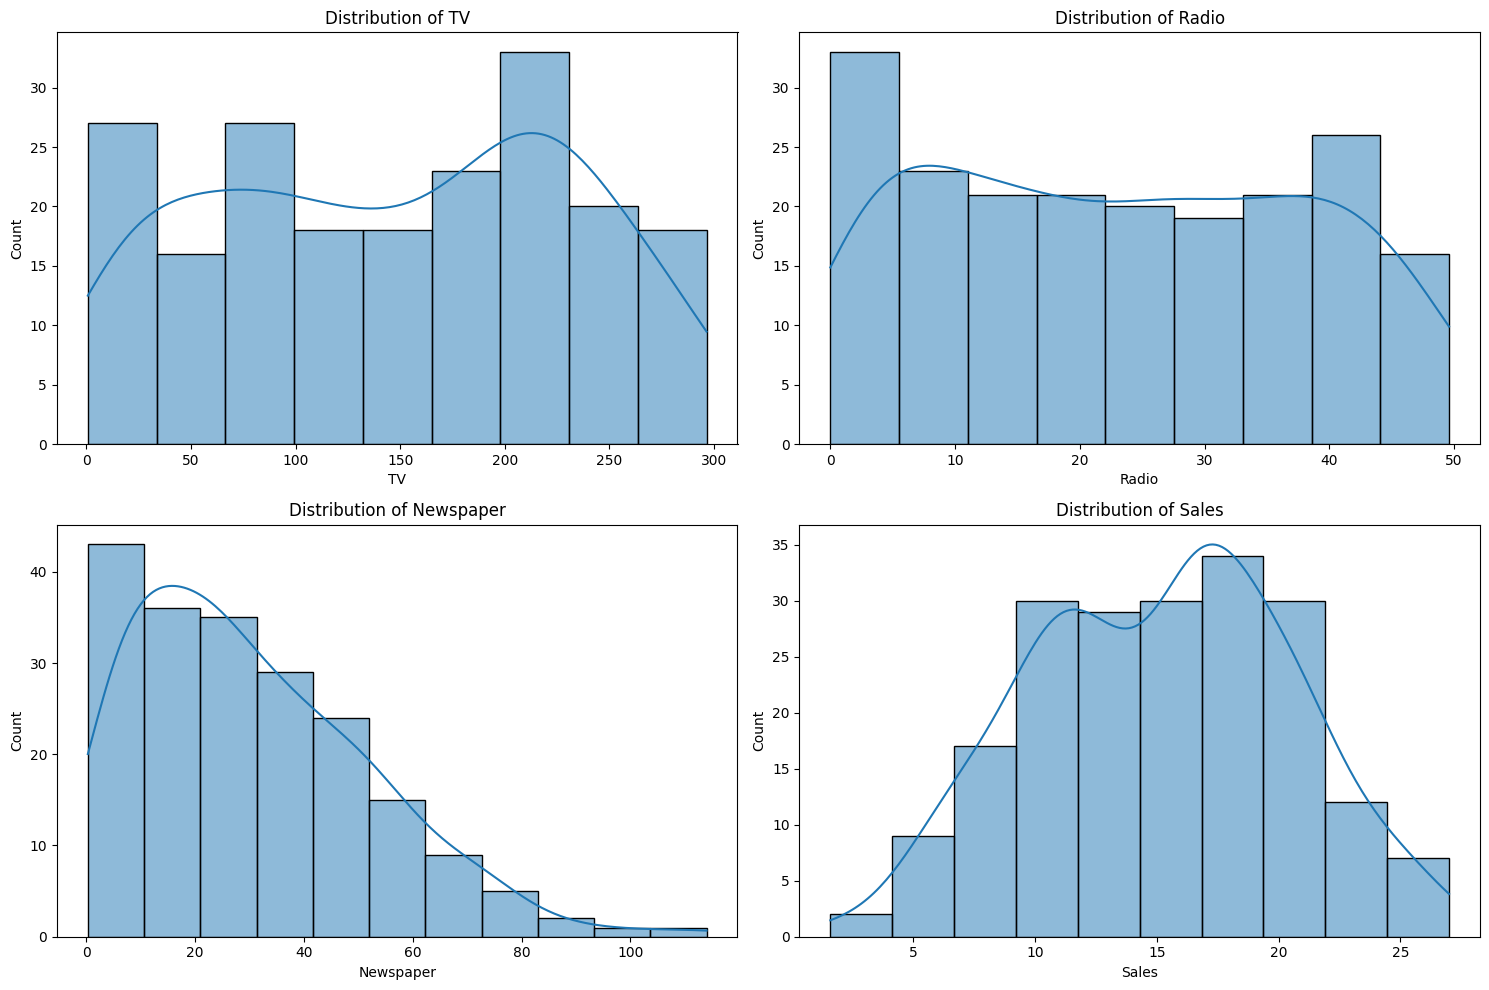

In [2]:
display(df.describe())
display(df.isnull().sum())

import matplotlib.pyplot as plt
import seaborn as sns
# Analyze the distribution of each numerical
numerical_cols = ['TV', 'Radio', 'Newspaper', 'Sales']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [3]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
display(X.head())
display(y.head())

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X)

In [6]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.706006147627315
R-squared: 0.9025912899684558


In [7]:
import pandas as pd
# new data
new_data = pd.DataFrame({
    'TV': [100, 50, 250],
    'Radio': [20, 30, 40],
    'Newspaper': [10, 5, 15]
})
# Make predictions
predicted_sales = model.predict(new_data)
print("Predicted Sales:")
print(predicted_sales)

Predicted Sales:
[12.21308326 10.55912823 22.52165316]


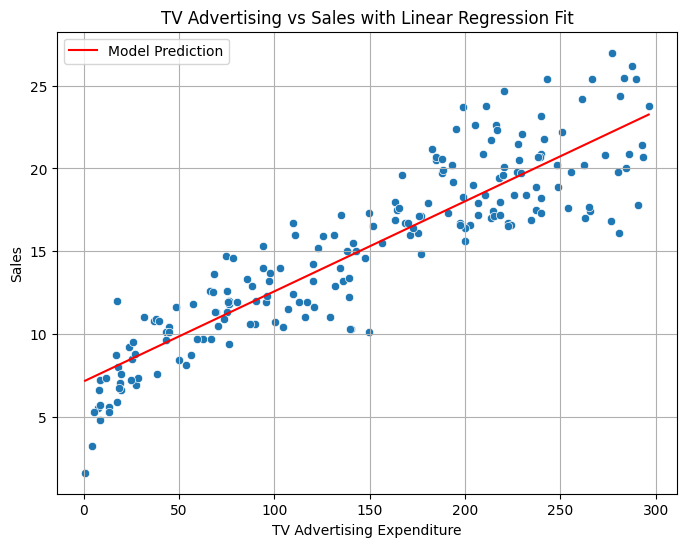

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# scatter plot for TV vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=df)

# range of TV values
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 100).reshape(-1, 1)

# DataFrame with only TV values
tv_pred_data_simple = pd.DataFrame({'TV': tv_range.flatten(),
                                   'Radio': df['Radio'].mean(),
                                   'Newspaper': df['Newspaper'].mean()})

tv_pred_sales_simple = model.predict(tv_pred_data_simple)

# Plot
plt.plot(tv_range, tv_pred_sales_simple, color='red', label='Model Prediction')

plt.title('TV Advertising vs Sales with Linear Regression Fit')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()